In [4]:
# 1. Importação das Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para mostrar números decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2. Carregamento dos Dados
df = pd.read_excel('/content/Online Retail.xlsx')
display(df.head())

print("\n--- Informações Técnicas (Tipos e Nulos) ---")
df.info()

print("\n--- Estatísticas Descritivas (Atenção aos Mínimos!) ---")
display(df.describe())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom



--- Informações Técnicas (Tipos e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

--- Estatísticas Descritivas (Atenção aos Mínimos!) ---


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


##Análise sobre as limpezas

* **CustomerID Nulos:** CustomerID tem menos linhas que o total (ex: 406.829
non-null vs 541.909 total). ~135 mil vendas sem CostumerID.

* **Quantidade Negativa:** No describe(), coluna Quantity, o valor min (mínimo) é negativo (ex: -80995). Isso são devoluções ou cancelamentos.

* **Preço Unitário Zero ou Negativo:** Na coluna UnitPrice, se tiver valor 0, é brinde ou erro. Se tiver negativo, é ajuste contábil.

In [5]:
# 1. Removendo linhas onde CustomerID é Nulo (NaN)
df_clean = df.dropna(subset=['CustomerID'])

# 2. Removendo Devoluções (Quantidade negativa) e Preços Zerados
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# 3. Verificando df após limpeza
linhas_antes = df.shape[0]
linhas_depois = df_clean.shape[0]
removidas = linhas_antes - linhas_depois

print(f"Linhas Originais: {linhas_antes}")
print(f"Linhas Limpas:    {linhas_depois}")
print(f"Linhas Removidas: {removidas} ({removidas/linhas_antes:.1%} do total)")

# 4. Convertendo CustomerID para Inteiro
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

print("\n--- Dados Limpos ---")
display(df_clean.describe())

Linhas Originais: 541909
Linhas Limpas:    397884
Linhas Removidas: 144025 (26.6% do total)

--- Dados Limpos ---


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.00,397884,397884.00,397884.00
mean,12.99,2011-07-10 23:41:23.511023360,3.12,15294.42
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,179.33,NaN,22.10,1713.14


O descarte de dados incompletos foi necessário para evitar distorções. Registros sem identificação de cliente não permitem a atribuição de histórico de compra, tornando-os inutilizáveis para análises de CRM. A estratégia adotada focou na **confiabilidade estatística**, trabalhando com uma base reduzida, porém **auditável e livre de ruídos**.

In [8]:
#Verificando os tipos de dados depois de transformados
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


###Engenharia de Atributos

Construindo a modelagem da tabela que vamos usar para calcular o RFM

In [9]:
# 1. Criando a coluna de Preço Total (TotalPrice)
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 2. Definindo a Data de Referência (Snapshot Date)
# Foi pego a última data do dataset + 1 dia para simular que a análise foi feita no contexto adequado
data_referencia = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Data de Referência para o cálculo: {data_referencia}")

# 3. Agrupando por Cliente para calcular RFM
df_rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_referencia - x.max()).days, #Diferença Data Referencia e Última Compra (em dias)
    'InvoiceNo': 'nunique', #Contagem de Notas Fiscais ÚNICAS
    'TotalPrice': 'sum'     #Soma do gasto total
})

# 4. Renomeando as colunas para ficar clara a informação
df_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print("\n--- Tabela RFM Pronta (Primeiros 5 Clientes) ---")
display(df_rfm.head())

Data de Referência para o cálculo: 2011-12-10 12:50:00

--- Tabela RFM Pronta (Primeiros 5 Clientes) ---


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


A exemplo do cliente da primeira linha CostumerID 12346:
- é um cliente que faz quase um ano que não compra (326 dias) da ultima compra.
- comprou uma única vez, ou seja, não criou fidelidade.
- gastou um valor alto de R$77183,60.

## Tratamento de Outliers e Escala

Em datasets transacionais de varejo, os *outliers* na variável Monetária frequentemente representam os clientes de maior valor (VIPs ou "Whales"). A exclusão desses registros resultaria na perda do segmento mais estratégico para o negócio.

No entanto, algoritmos baseados em distância (como o K-Means) são sensíveis a grandes variações de escala. Um cliente com gasto de 77.000 distorceria o centroide do cluster em comparação a um cliente de 500.

**Solução Aplicada: Transformação Logarítmica**
A aplicação de `np.log` comprime a magnitude dos dados, reduzindo a variância sem alterar a ordem de importância.

* **Antes do Log:** Distância absoluta de ~76.500 (77k vs 500).
* **Após o Log:** Distância reduzida para ~2.1 (escala logarítmica).

Isso permite que o modelo identifique os padrões de comportamento sem que os valores monetários extremos dominem excessivamente o cálculo das distâncias.

Observe a diferença do comportamento dos dados entre os dois gráficos abaixo.

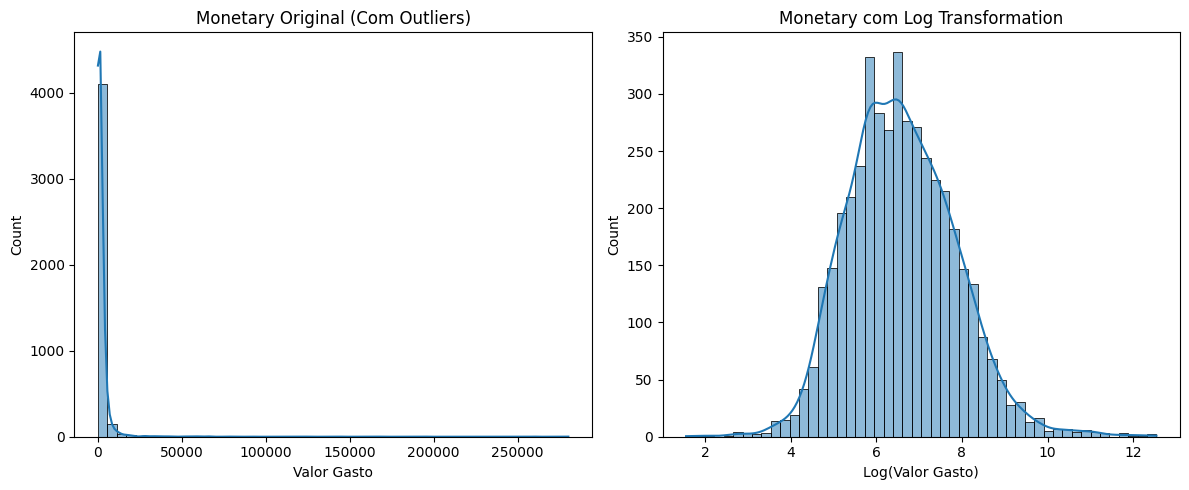

In [12]:
# Configurando o tamanho da imagem
plt.figure(figsize=(12, 5))

# Gráfico 1: Antes do Log (com Outliers)
plt.subplot(1, 2, 1)
sns.histplot(df_rfm['Monetary'], bins=50, kde=True)
plt.title('Monetary Original (Com Outliers)')
plt.xlabel('Valor Gasto')

# Gráfico 2: Depois do Log (dado tratado)
plt.subplot(1, 2, 2)

# Replicando a transformação
sns.histplot(np.log(df_rfm['Monetary'] + 1), bins=50, kde=True)
plt.title('Monetary com Log Transformation')
plt.xlabel('Log(Valor Gasto)')

plt.tight_layout()
plt.show()

In [13]:
# 1. Importando as ferramentas de Pré-processamento
from sklearn.preprocessing import StandardScaler

# 2. Aplicando Log Transformation
df_rfm_log = np.log(df_rfm + 1)

# 3. Inicializando o Scaler
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df_rfm_log)

# Transformando de volta em df para facilitar visualização
df_normalized = pd.DataFrame(rfm_normalized, index=df_rfm.index, columns=df_rfm.columns)

print("--- Dados Padronizados (Média ~0, Desvio Padrão ~1) ---")
display(df_normalized.head())

print("\n--- Estatísticas dos Dados Normalizados ---")
display(df_normalized.describe())

--- Dados Padronizados (Média ~0, Desvio Padrão ~1) ---


,Recency,Frequency,Monetary
CustomerID,,,
12346,1.46,-0.96,3.71
12347,-2.04,1.07,1.41
12348,0.37,0.39,0.72
12349,-0.62,-0.96,0.70
12350,1.42,-0.96,-0.62



--- Estatísticas dos Dados Normalizados ---


,Recency,Frequency,Monetary
count,4338.00,4338.00,4338.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-2.34,-0.96,-4.00
25%,-0.66,-0.96,-0.69
50%,0.09,-0.36,-0.06
75%,0.84,0.65,0.65
max,1.56,5.86,4.73


### O Modelo K-Means e o Método do Cotovelo

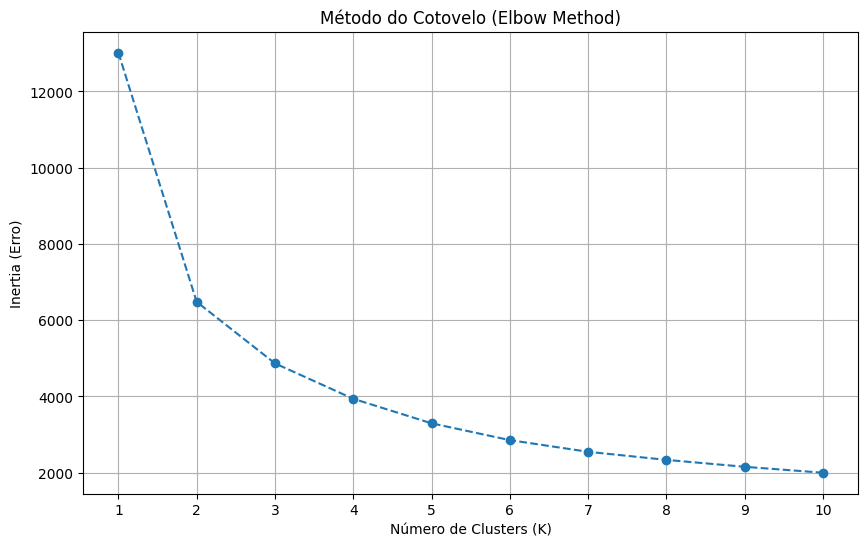

In [16]:
# 1. Importando o K-Means
from sklearn.cluster import KMeans

# 2. Teste do Cotovelo
inertia = []
k_range = range(1, 11)

for k in k_range:
    # random_state=42 garante que o resultado seja sempre o mesmo (reprodutibilidade)
    # n_init=10 faz o algoritmo rodar 10 vezes e pegar o melhor resultado
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# 3. Plotando o gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia (Erro)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Foi escolhido 4 grupos para começar.

**Por que 4?** Pensando na reunião com o Diretor de Marketing. É muito mais fácil explicar uma estratégia para 4 perfis claros do que para 5 ou 6, onde as diferenças começam a ficar sutis demais *("Ah, esse grupo é quase igual aquele, só gasta um pouquinho menos")*.

Com **4 grupos**, é possível capturar os **arquétipos clássicos**:

- **VIPs / Champions **(A nata).

- **Fiéis / Leais** (Compram sempre, mas gastam menos que os VIPs).

- **Novos / Promissores **(Acabaram de chegar).

- **Em Risco / Perdidos** (Já foram bons, mas sumiram).

In [17]:
# 1. Configurando o Modelo com 4 Grupos
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)

# 2. Treinando e já atribuindo os clusters (Fit & Predict)
# Criamos uma coluna nova 'Cluster' na tabela original RFM
df_rfm['Cluster'] = kmeans_final.fit_predict(df_normalized)
display(df_rfm.head())

# Agrupando pelos clusters p/ tirar a média de R, F e M.
analise_clusters = df_rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count' # Conta quantos clientes tem em cada grupo
}).rename(columns={'Cluster': 'Qtd Clientes'})

print("\n--- Perfil Médio de Cada Grupo ---")

# Ordenado pelo Monetário para facilitar: O grupo que gasta mais aparece primeiro
display(analise_clusters.sort_values(by='Monetary', ascending=False))

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,1,77183.60,2
12347,2,7,4310.00,1
12348,75,4,1797.24,2
12349,19,1,1757.55,0
12350,310,1,334.40,3



--- Perfil Médio de Cada Grupo ---


,Recency,Frequency,Monetary,Qtd Clientes
Cluster,,,,
1,12.13,13.71,8074.27,716
2,71.08,4.08,1802.83,1173
0,18.12,2.15,551.82,837
3,182.50,1.32,343.45,1612


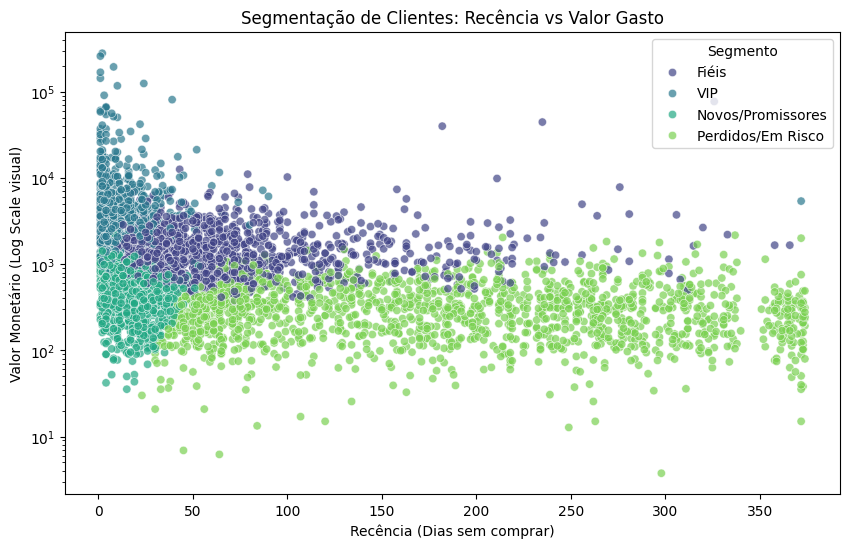

,count
Segmento,
Perdidos/Em Risco,1612
Fiéis,1173
Novos/Promissores,837
VIP,716


In [19]:
# Renomeando os clusters com os arquéticos clássicos
def nomear_cluster(cluster):
    if cluster == 1:
        return 'VIP'       # Monetário alto, Frequência alta e Recência baixa/pequena
    elif cluster == 3:
        return 'Perdidos/Em Risco'       # Recência muito alta
    elif cluster == 0:
        return 'Novos/Promissores' # Recência baixa e monetário baixo
    elif cluster == 2:
        return 'Fiéis'         # Monetário alto e Recência alta
    else:
        return 'Outros'

df_rfm['Segmento'] = df_rfm['Cluster'].apply(nomear_cluster)

# Visualizando o gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Recency', y='Monetary', hue='Segmento', palette='viridis', alpha=0.7)
plt.title('Segmentação de Clientes: Recência vs Valor Gasto')
plt.xlabel('Recência (Dias sem comprar)')
plt.ylabel('Valor Monetário (Log Scale visual)')
plt.yscale('log') # Escala log no gráfico para ver melhor os VIPs
plt.show()

# Contagem final para ver o tamanho de cada grupo
display(df_rfm['Segmento'].value_counts())

### Gráfico de bolhas interativo para analisar as informações do K-Means


In [23]:
fig = px.scatter(df_rfm,
                 x='Recency',
                 y='Monetary',
                 color='Segmento',
                 size='Frequency',
                 hover_name='CustomerID',
                 log_y=True,
                 size_max=40, # limite máximo
                 title='Segmentação de Clientes (Tamanho Proporcional Ajustado)',
                 template='plotly_white')

# Sizemin=4 garante que as menores frequencias ainda fiquem visíveis no gráfico
fig.update_traces(marker=dict(sizemin=4, opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey')))

fig.show()

### Analisando o cliente 17820 classificado como VIP pelo algoritmo e deslocado no gráfico a direita...

In [25]:
# 1. Selecionando as métricas do Cliente "Problemático" (O ponto que você achou no gráfico)
# Substitua pelo CustomerID dele se você souber, ou use os valores manuais que vimos na imagem:
cliente_outlier = pd.DataFrame({
    'Segmento': ['Cliente Analisado (Outlier)'],
    'Recency': [372],      # Ruim (Puxa para longe do VIP)
    'Frequency': [34],     # Ótimo (Puxa MUITO para o VIP)
    'Monetary': [5391]     # Ótimo (Puxa MUITO para o VIP)
})

# 2. Calculando a média dos clusters que estamos em dúvida (VIP vs Fiéis)
comparativo_clusters = df_rfm.groupby('Segmento')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
comparativo_clusters = comparativo_clusters[comparativo_clusters['Segmento'].isin(['VIP', 'Fiéis'])]

# 3. Juntando tudo numa tabela só para comparar
tabela_prova = pd.concat([comparativo_clusters, cliente_outlier], ignore_index=True)

# Reordenando para facilitar a leitura
tabela_prova = tabela_prova.set_index('Segmento').reindex(['Fiéis', 'Cliente Analisado (Outlier)', 'VIP'])

print("--- Por que o K-Means escolheu VIP? (Comparativo de Distância) ---")
display(tabela_prova)

--- Por que o K-Means escolheu VIP? (Comparativo de Distância) ---


,Recency,Frequency,Monetary
Segmento,,,
Fiéis,71.08,4.08,1802.83
Cliente Analisado (Outlier),372.00,34.00,5391.00
VIP,12.13,13.71,8074.27


### Análise de Outlier: O Fenômeno do "Churned VIP"

Observou-se a presença de clientes com **Recência extremamente alta (> 370 dias)** classificados no cluster **"Champions (VIP)"**. À primeira vista, isso contradiz a lógica de negócios, onde um cliente inativo deveria ser classificado como "Perdido" ou "Em Risco".

**Justificativa Algorítmica:**
O algoritmo K-Means agrupa dados baseando-se na proximidade vetorial (Distância Euclidiana) em todas as dimensões disponíveis (R, F e M). Ao analisar o cliente outlier em comparação aos centróides (médias) dos grupos:

1.  **Dimensão Frequência:** O cliente possui 34 compras. A média do grupo "Fiéis" é ~4, enquanto a do "VIP" é ~13. A distância para o grupo "Fiéis" nesta dimensão é matematicamente proibitiva.
2.  **Dimensão Monetária:** O gasto de 5.391 aproxima-se muito mais do perfil VIP (Média ~8k) do que do perfil Fiel (Média ~1.8k).

**Conclusão Técnica:**
Embora a Recência puxe o vetor para longe do cluster VIP, a força de atração das variáveis **Frequência** e **Monetário** é preponderante. O algoritmo priorizou corretamente a magnitude do valor financeiro e transacional.

Para alinhar o modelo estatístico à realidade operacional do Marketing, faz-se necessário aplicar uma **Regra de Negócio Pós-Processamento**: clientes classificados como VIPs, mas com Recência superior a 90 dias, devem ser reclassificados manualmente como *"Churned VIPs"* (Ex-VIPs), sinalizando prioridade máxima para **campanhas de reconquista.**

### Porque a escolha de Recência de 90 dias?

In [27]:
# 1. Filtrando apenas os VIPs
vips = df_rfm[df_rfm['Cluster'] == 1].copy()

# 2. Tempo Médio entre Compras (Purchase Latency)
vips['Dias_Entre_Compras'] = 365 / vips['Frequency']

print(f"Média de dias entre compras dos VIPs: {vips['Dias_Entre_Compras'].mean():.1f} dias")
print(f"Mediana (o valor mais comum): {vips['Dias_Entre_Compras'].median():.1f} dias")

# 3. Validando a Regra dos 90 dias
# Qual porcentagem dos VIPs costuma ficar mais de 90 dias sem comprar naturalmente
vips_lentos = vips[vips['Dias_Entre_Compras'] > 90]
percentual = (len(vips_lentos) / len(vips)) * 100

print(f"\nQuantos % dos VIPs demoram mais de 90 dias para voltar naturalmente? {percentual:.1f}%")

Média de dias entre compras dos VIPs: 39.7 dias
Mediana (o valor mais comum): 36.5 dias

Quantos % dos VIPs demoram mais de 90 dias para voltar naturalmente? 3.5%


### Validação Estatística da Regra de "Churn" (90 Dias)

A análise de latência de compra (tempo entre pedidos) confirma que a escolha do corte de **90 dias** para considerar um VIP como "Perdido" é estatisticamente robusta e segura.

**Evidências dos Dados:**
1.  **Ciclo Natural:** Nossos VIPs compram, em média, a cada **~40 dias**.
2.  **Margem de Segurança:** O prazo de 90 dias representa mais que o dobro (>2x) do ciclo médio de compra. Estamos dando duas chances para o cliente voltar antes de classificar como risco.
3.  **Baixo Risco de Erro:** Apenas **3.5%** da base VIP possui um ciclo natural maior que 90 dias.
    * *Conclusão:* Se um VIP ultrapassa a barreira de 90 dias sem comprar, há **96.5% de probabilidade** de que isso seja uma quebra de comportamento (Churn) e não apenas um intervalo natural.

In [26]:
# 1. Definindo a Função de Regra de Negócio
def classificar_cliente_final(row):
    cluster = row['Cluster']
    recencia = row['Recency']

    if cluster == 1:
        if recencia > 90:
            return 'Churned VIP' # Ex-VIP (Ouro para recuperação)
        else:
            return 'VIP'      # VIP ativo
    elif cluster == 3:
        return 'Perdidos/Em Risco'
    elif cluster == 0:
        return 'Novos/Promissores'
    elif cluster == 2:
        return 'Fiéis'
    else:
        return 'Outros'

# 2. Aplicando a função
# axis=1, tabela linha por linha
df_rfm['Segmento_Refinado'] = df_rfm.apply(classificar_cliente_final, axis=1)

# 3. Verificando quantos clientes caíram nessa nova categoria
contagem = df_rfm['Segmento_Refinado'].value_counts()
print("--- Nova Distribuição de Clientes ---")
display(contagem)

# 4. Visualizando onde eles estão no gráfico (Devem aparecer em Vermelho)
import plotly.express as px

fig = px.scatter(df_rfm,
                 x='Recency',
                 y='Monetary',
                 color='Segmento_Refinado', # Usamos a nova coluna refinada
                 hover_name='CustomerID',
                 title='Segmentação Final com Recuperação de VIPs',
                 color_discrete_map={
                     'Champions (VIP)': 'gold',        # Dourado
                     'Churned VIP (Ex-VIP)': 'red',    # Vermelho (Ação Imediata!)
                     'Loyal (Fiéis)': 'purple',        # Roxo
                     'New/Promising (Novos)': 'cyan',  # Ciano
                     'Lost (Perdidos)': 'gray'         # Cinza
                 },
                 log_y=True,
                 template='plotly_white')

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

--- Nova Distribuição de Clientes ---


,count
Segmento_Refinado,
Perdidos/Em Risco,1612
Fiéis,1173
Novos/Promissores,837
VIP,715
Churned VIP,1


### Resultado da Reclassificação: Saúde da Base VIP

A aplicação da regra de negócio identificou apenas **1 cliente** no segmento *"Churned VIP"*. Embora quantitativamente pequeno, este resultado traz insights qualitativos cruciais:

1.  **Alta Retenção Premium:** A quase inexistência de VIPs com Recência > 90 dias demonstra que o cluster "Champions" é extremamente engajado e saudável. A empresa está conseguindo manter seus melhores compradores ativos dentro do ciclo trimestral.
2.  **Monitoramento de Exceção:** A categoria *Churned VIP* deve permanecer no modelo como um "Sistema de Alerta". O objetivo da área de CRM deve ser manter essa lista vazia. O fato de haver apenas um cliente isolado (o outlier de R$ 5k) valida que ele é um caso pontual que exige intervenção cirúrgica, e não um problema sistêmico de perda de clientes.

In [28]:
# Arquivo para usar no Dashboard
df_rfm.to_excel('RFM_Final_Refinado.xlsx')

from google.colab import files
files.download('RFM_Final_Refinado.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
!pip install pygwalker -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.4 MB/s eta 0:00:00


In [32]:
import pygwalker as pyg

# Criando a métrica de Ticket Médio (Gasto Médio por Pedido)
df_rfm['Ticket_Medio'] = df_rfm['Monetary'] / df_rfm['Frequency']

# Resetando index
df_visual = df_rfm.reset_index()

# 3. Gerando o Dashboard Interativo
walker = pyg.walk(df_visual)

Box(children=(HTML(value='\n<div id="ifr-pyg-000647adc4053b52D1KxPUOim3nJzhd6" style="height: auto">\n    <hea…

In [33]:
import plotly.express as px

# Criando o Cubo 3D Interativo
fig = px.scatter_3d(df_rfm,
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Segmento_Refinado', # As cores dos grupos
                    opacity=0.7, # Transparência para ver os pontos de trás
                    symbol='Segmento_Refinado', # Formatos diferentes para cada grupo (Opcional)
                    log_z=True, # Escala Log no dinheiro (senão o VIP estica demais o gráfico)
                    title='Visão 3D: A Separação dos Grupos (R x F x M)',
                    template='plotly_white',
                    height=700) # Tamanho da janela

# Ajustando o tamanho das bolinhas para ficar elegante
fig.update_traces(marker=dict(size=4))

fig.show()

O cluster VIP (Laranja): Veja como eles se descolam totalmente da massa. Eles estão no alto (muito dinheiro) e encostados na parede da direita (Recência zero). É um grupo exclusivo.

O "Tapete" dos Perdidos (Roxo): Veja como eles ficam "no chão" (gastam pouco) e se espalham para a esquerda (Recência aumentando).

A Escada de Crescimento: Dá para ver visualmente o caminho que queremos que o cliente faça: Sair do Verde (Novo) $\rightarrow$ Subir para o Azul (Fiel) $\rightarrow$ finalmente entrar para o Laranja (VIP).